<a href="https://colab.research.google.com/github/rafaelnduarte/Credit_Card_Default_Prediction_Nubank/blob/master/Risk_Analysis_of_Credit_Card_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risk Analysis of Credit Card Default - Nubank

[![LinkedIn](https://img.shields.io/badge/LinkedIn-rafaelnduarte-blue.svg)](https://www.linkedin.com/in/rafael-n-duarte)
[![GitHub](https://img.shields.io/badge/GitHub-rafaelnduarte-purple.svg)](https://github.com/rafaelnduarte)

One of the most problematic areas for banks, funding bodies, and businessmen is the **default rate** of their clients.

Analyzing whether a person will follow through with their financial responsibilities or not is extremely important and can cause a big impact on the balance of the institutions. Solutions have been developed and improved to minimize  default risk. 

A Default, in simple terms, is when the fulfillment of the obligations and/or conditions of a loan, such as financing or credit card debt. Usually, the main reason for not fulfilling the conditions of payment is the client's financial incapability.

<p align=center>
  <img src="https://image.freepik.com/free-vector/debt-bankruptcy-symbol_98292-4514.jpg" height="300px">
</p>
 
Big banks and Fintechs have been investing heavily in Machine Learning Models to prevent defaults.

Latin America's biggest Fintech, [Nubank](https://nubank.com.br/sobre-nos), is the one that has been shining the brightest when it comes to Data Science and Artificial Intelligence solutions.

The dataset analyzed in this project is part of a competition proposed by the Startup to reveal new talents and prospects for the Fintech.

## Contextualizing the problem

In this project, the goal is to predict the probability of credit card default of Nubank's clients.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>
  
It's important to mention that this evaluation must be done at the moment the client requests a credit card (usually the first contact with the institution).


> **GOAL: Create a model that provides the probability of credit card default of the clients.**



The model is expected to be able to decrease the company's financial losses while minimizing false positives.


## Importing the Data

The data to be utilized in this analysis are available for download in this [link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). It consists of a 'csv' file with 45.000 entries and 43 columns.

This file will be imported into a data frame structure, utilizing the 'pandas' library, in order to be analyzed.

In [61]:
# instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

!pip install -q scikit-plot
import scikitplot as skplt

# random seed
np.random.seed(42)

# definir o estilo do seaborn para os plots
sns.set_style()

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')


In [23]:
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

## Exploratory Data Analysis

In [24]:
# data frame dimensions
print("Data Frame Dimensions:")
print("Lines:\t\t{}".format(df.shape[0]))
print("Columns:\t{}".format(df.shape[1]))

Data Frame Dimensions:
Lines:		45000
Columns:	43


#### Data Dictionary
* ids                                                  
* target_default                                       
* score_1                                              
* score_2                                              
* score_3                                             
* score_4                                             
* score_5                                             
* score_6                                             
* risk_rate                                           
* last_amount_borrowed                                
* last_borrowed_in_months                             
* credit_limit                                        
* reason                                               
* income                                              
* facebook_profile                                     
* state                                                
* zip                                                  
* channel                                              
* job_name                                             
* real_state                                           
* ok_since                                            
* n_bankruptcies                                      
* n_defaulted_loans                                   
* n_accounts                                          
* n_issues                                            
* application_time_applied                             
* application_time_in_funnel                            
* email                                                
* external_data_provider_credit_checks_last_2_year    
* external_data_provider_credit_checks_last_month       
* external_data_provider_credit_checks_last_year      
* external_data_provider_email_seen_before            
* external_data_provider_first_name                    
* external_data_provider_fraud_score                    
* lat_lon                                              
* marketing_channel                                    
* profile_phone_number                                 
* reported_income                                     
* shipping_state                                       
* shipping_zip_code                                     
* profile_tags                                         
* user_agent                                           
* target_fraud                     

In [25]:
df.head(3)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN


In [26]:
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

Statistical distribution of the numerical variables.

In [27]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Distribution of the categorical variables.

In [28]:
df.describe(include=['O'])

,ids,target_default,score_1,score_2,reason,facebook_profile,state,zip,channel,job_name,real_state,application_time_applied,email,external_data_provider_first_name,lat_lon,marketing_channel,profile_phone_number,shipping_state,profile_tags,user_agent,target_fraud
count,45000,41741,44438,44438,44434,40542,44438,44438,44438,41664,44438,45000,45000,45000,43637,41422,45000,45000,45000,44278,1522
unique,45000,2,7,35,14874,2,50,823,1,32265,5,35543,6,32886,22412,9,45000,25,26131,297,2
top,30507e81-1f0c-01e2-5868-1536a1d38668,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,False,xsd3ZdsI3356I3xMxZeiqQ==,3k2JCQ8Bp5oDwaI39ZJgHA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,18:02:09,gmail.com,claudinei,"(-5.164423488858103, -37.356920426246845)",Website,705-7932581,BR-SP,{'tags': ['aty']},Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,fraud_friends_family
freq,1,35080,14523,3573,4463,24933,7429,566,44438,167,22353,6,22720,7,18,10950,1,6994,358,195,904


#### Missing Values

In [29]:
# missing values
print("\nMISSING VALUES:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


MISSING VALUES:
target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defau

Let's talk about the insights obtained from the visualization above:

* The variables ['target_fraud', 'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year'] have over 50% of their values missing. These variables will more likely be discarded.
* The variables ['external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues'] have from 25% to 34% of their values missing.

In our description of the categorical data above we've seen the unique values for each of the categorical variables, but, for better visualization, let's check for unique values again.

In [30]:
# unique values
print("\nUNIQUE VALUES:")
print(df.nunique().sort_values())


UNIQUE VALUES:
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               4

Analyzing the visualization above, we notice that:

* The columns 'external_data_provider_credit_checks_last_2_year' and 'channel' have only one possible value. Since we don't have any further information on the features, we'll drop these two columns when preparing the data for our Machine Learning model.

* On top of that, we can see that the variable 'profile_phone_number' has over 45.000 possible values, which probably brings no useful information for our analysis and model.

Now that we've taken a look at the dataset as a whole, let's take a closer look at our target variable 'target_default' and see how it relates to the rest of the dataset.

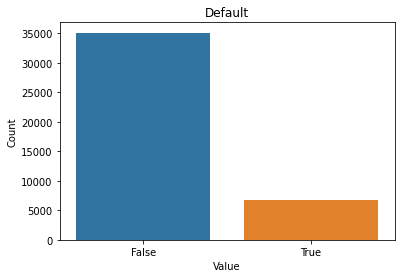

Proportion of Credit Card default in the dataset:
False    0.779556
True     0.148022
Name: target_default, dtype: float64


In [31]:
# proportion of default in the dataset
fig, ax = plt.subplots()
sns.countplot('target_default', data=df, ax=ax)
ax.set_title("Default")
ax.set_xlabel("Value")
ax.set_ylabel("Count")
plt.show()

print("Proportion of Credit Card default in the dataset:")
print(df['target_default'].value_counts() / df.shape[0])

As expected, we confirm that the majority of the dataset consists on good payers, with defaults accounting for about 15% of the dataset.

We'll work on that later.

### Preparing the Data

We've briefly analyzed our data, but to have a more comprehensive overview, we need to work on our dataset a little bit. 

Let's do that, and then continue our analysis.

In [32]:
# creating a copy of the dataset
df_clean = df.copy()

In our analysis, we identified some entries with infinite values for the variable 'reported_income'. 

Inifinite values are a problem for our model, and must be fixed.

* We're going to replace the **infinite** values with **NaN**.

In [33]:
# substituting inf with nan in reported_income 
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf,
                                                                  np.nan)

The next step is discarding unnecessary columns.

We're going to drop the columns 'ids', 'target_fraud', 'external_data_provider_credit_checks_last_2_year', and 'channel'.

* 'Ids' are not relevant for the model, and 'target_fraud' is not related to the task at hand. 
* When it comes to 'channel' and 'external_data_provider_credit_checks_last_2_year', they have only one possible value. That means that they can't make a difference in our model, so let's drop them too.

In [34]:
# dropping the columns ids, target_fraud,
# external_data_provider_credit_checks_last_2_year and channel
df_clean.drop(labels=['ids', 'target_fraud',
                      'external_data_provider_credit_checks_last_2_year',
                      'channel'], axis=1, inplace=True)

Now it's time to deal with too large values in the dataset. In the variable 'external_data_provider_email_seen_before' we have entries with the value -999.0. Let's replace these entries with NaN.

* This kind of value wouldn't fit in our model.

In [35]:
#  substituting -999 in external_data_provider_email_seen_before with NaN
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan

In [36]:
from sklearn.impute import SimpleImputer

num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

# substituting missing values
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

# numerical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])

# categorical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

Finally, in our target variable there are some missing values. Our model would be the one capable of telling us what to put in these blanks, but to build it, we can't have them.

In this case, the best option would be to drop the lines of the dataset that have missing values for our target variable.

In [37]:
# eliminating entries where target_default is NaN
df_clean.dropna(subset=['target_default'], inplace=True)

In [38]:
df_clean.head(3)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,32.0,0.0,0.0,18.0,18.0,07:52:34,444.0,outlook.com,2.0,0.0,51.0,leidelaura,645.0,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528.0,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346.0,gmail.com,1.0,0.0,17.0,diocezio,243.0,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933.0,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25647.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,False,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,32.0,0.0,0.0,10.0,0.0,00:60:02,6.0,gmail.com,2.0,1.0,9.0,veralucia,65.0,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985.0,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...


Despite not having more information on the features, we can assume that the NaN values are due to two factors:

1. Some items are not mandatory when filling out the form, such as Facebook profile integration.
2. There is no observation regarding the columns, like in ['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues'].

Overall, for the variables that we don't have much information on, let's fill the NaN values with zero. For the numerical variables, we'll fill in with the median, and categorical variables will be filled in with the most frequent value.

Let's check for null values and see it worked.

In [39]:
# checking for null values
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
reason                                             0
income                                             0
facebook_profile                                   0
state                                              0
zip                                                0
job_name                                           0
real_state                                         0
ok_since                                      

In [40]:
df_clean.dtypes

target_default                                        bool
score_1                                             object
score_2                                             object
score_3                                            float64
score_4                                            float64
score_5                                            float64
score_6                                            float64
risk_rate                                          float64
last_amount_borrowed                               float64
last_borrowed_in_months                            float64
credit_limit                                       float64
reason                                              object
income                                             float64
facebook_profile                                      bool
state                                               object
zip                                                 object
job_name                                            obje

Let's create a copy of our dataset for our analysis, just to be on the safe side.

In [41]:
df_eda = df_clean.copy()
df_eda.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000
mean,347.883556,100.006797,0.500037,99.925228,0.296633,4607.590065,13.962133,31703.232800,7.147825e+04,33.258933,0.075089,0.004511,10.688000,8.228778,247.537000,1.501067,0.670289,28.045356,500.399800,1.031004e+13,33923.514844
std,109.740995,3.178080,0.288326,10.016549,0.101298,8005.393392,20.574767,30729.712314,5.154691e+04,13.954793,0.272084,0.078894,4.564351,6.250257,146.118398,1.114941,0.470113,17.356466,287.968873,2.557745e+14,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,0.000000,0.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,4.030000e+02,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,0.000000,0.000000,17419.000000,4.501474e+04,32.000000,0.000000,0.000000,7.000000,0.000000,120.000000,1.000000,0.000000,13.000000,252.000000,5.094825e+04,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,0.000000,0.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,9.000000,248.000000,2.000000,1.000000,28.000000,503.000000,1.016300e+05,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,7525.775000,36.000000,35719.250000,8.503822e+04,32.000000,0.000000,0.000000,13.000000,12.000000,375.000000,2.000000,1.000000,43.000000,747.000000,1.511462e+05,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,6.355500e+15,56000.000000


In order to better analyze and visualize our dataset, let's encode the categorical variables.

In [42]:
from sklearn.preprocessing import LabelEncoder
encoded_eda = df_eda.copy()
# extracting the categorical variables
cat_cols = encoded_eda.select_dtypes('object').columns
bool_cols = encoded_eda.select_dtypes('bool').columns
# codifying each categorical column
for col in cat_cols:
  encoded_eda[col+'_encoded'] = LabelEncoder().fit_transform(encoded_eda[col])
  encoded_eda.drop(col, axis=1, inplace=True)

for col in bool_cols:
  encoded_eda[col+'_encoded'] = LabelEncoder().fit_transform(encoded_eda[col])
  encoded_eda.drop(col, axis=1, inplace=True)

Done! Let's see what our dataset looks like now:

In [43]:
encoded_eda.head(3)

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code,score_1_encoded,score_2_encoded,reason_encoded,state_encoded,zip_encoded,job_name_encoded,real_state_encoded,application_time_applied_encoded,email_encoded,external_data_provider_first_name_encoded,lat_lon_encoded,marketing_channel_encoded,profile_phone_number_encoded,shipping_state_encoded,profile_tags_encoded,user_agent_encoded,target_default_encoded,facebook_profile_encoded
0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,32.0,0.0,0.0,18.0,18.0,444.0,2.0,0.0,51.0,645.0,57849.0,17528.0,0,10,8335,44,208,27082,1,11973,4,19930,15025,2,27910,12,17167,86,0,1
1,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,50.0,0.0,0.0,14.0,14.0,346.0,1.0,0.0,17.0,243.0,4902.0,40933.0,3,16,12574,47,710,4109,1,3918,0,7792,6981,5,11504,20,21553,33,0,0
2,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25647.0,65023.65,32.0,0.0,0.0,10.0,0.0,6.0,2.0,1.0,9.0,65.0,163679.0,50985.0,3,9,4272,32,350,27321,3,1457,0,31062,14899,7,9945,19,6993,81,1,0


What we've done so far gave us a cleaner dataset, with which we can better analyze and visualize the data.

Let's do it!

Let's plot some histograms to check the distributions:

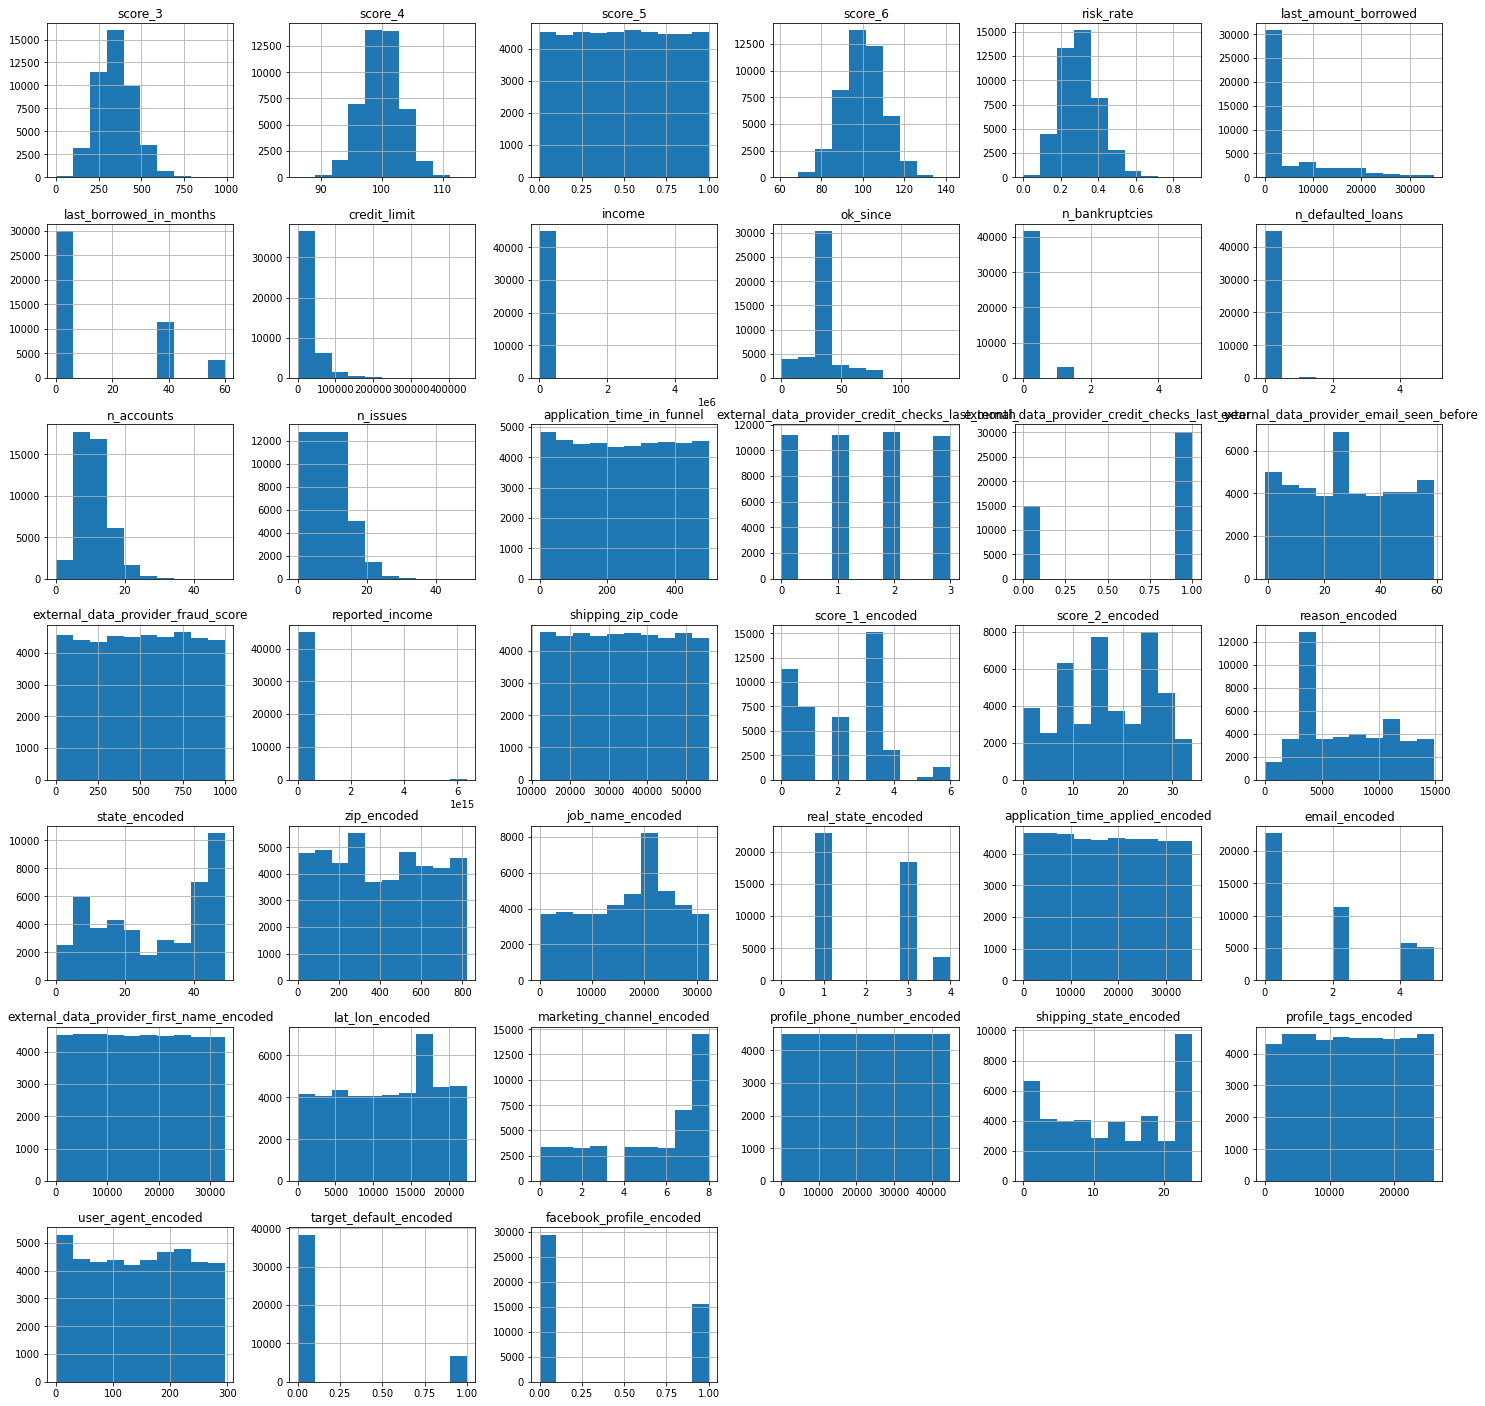

In [44]:
# plotting histograms
encoded_eda.hist(figsize=(25,25));
sns.set()

Now, let's take a look at some scatter plots to better understand the relation between some of our most interesting variables:

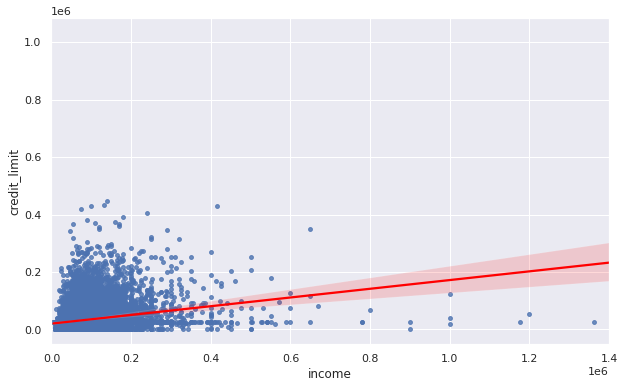

In [25]:
# scatter plot and linear regression
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlim(left=-1000,right=1400000)
sns.regplot('income', 'credit_limit', scatter_kws={"s": 15},
            line_kws={"color": "red"}, data=encoded_eda, ax=ax);

* Interesting distribution showing that higher income doesn't necessarily mean higher credit limit

The Number of Defaulted Loans seems like a variable that would move your Credit Limit. To check whether it's true or not, let's take a look at a scatter plot of the two variables.

Proportion of Number of Number of Defaulted Loans in the dataset:
0.0    0.996047
1.0    0.003450
2.0    0.000383
3.0    0.000096
5.0    0.000024
Name: n_defaulted_loans, dtype: float64


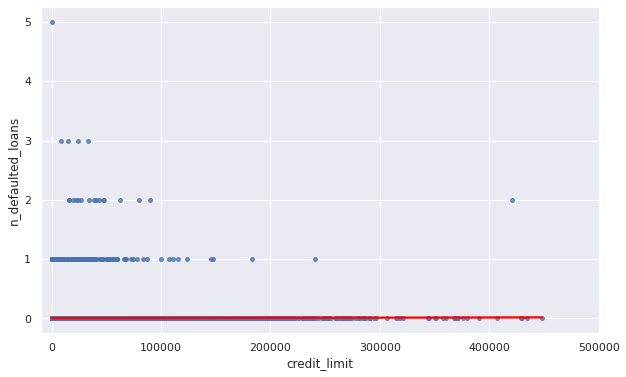

In [26]:
# scatter plot and linear regression
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlim(left=-10000,right=500000)
sns.regplot('credit_limit', 'n_defaulted_loans', scatter_kws={"s": 15},
           line_kws={"color": "red"}, data=encoded_eda, ax=ax);

print("Proportion of Number of Number of Defaulted Loans in the dataset:")
print(encoded_eda['n_defaulted_loans'].value_counts() / encoded_eda.shape[0])

What the graph above shows us is that the absolute majority of the population of our dataset has never had a loan default before.

Apart from the "outlier" with 2 defaults and a high credit limit, it also seems to influence the credit limit of the clients, as expected.

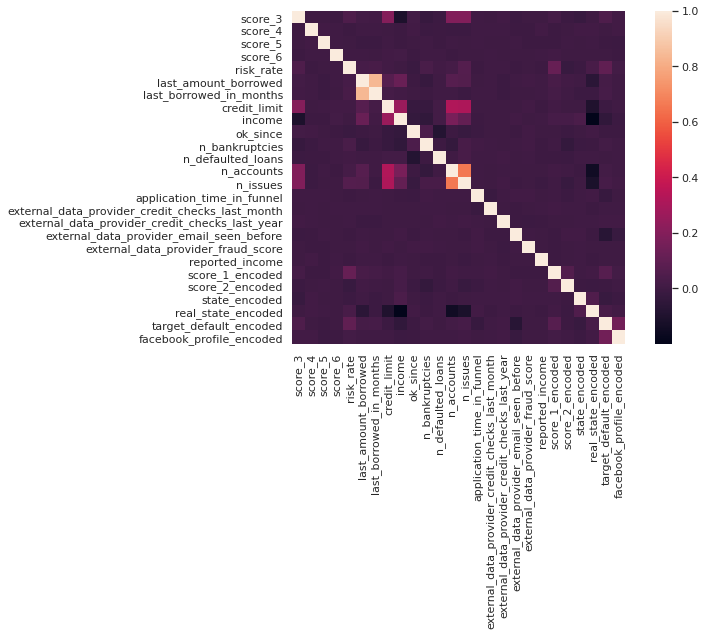

In [27]:
#@title Heatmap
# creating the correlation matrix
corr = encoded_eda.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, fmt='.2f', square=True, linecolor='white', vmax=1.0, annot=False);
plt.tight_layout()

There are too many variables, which makes this heatmap good for us to see the big picture, but it's not very informative.

Let's plot a more relevant heatmap using the 10 most correlated variables to 'target_default_encoded'.

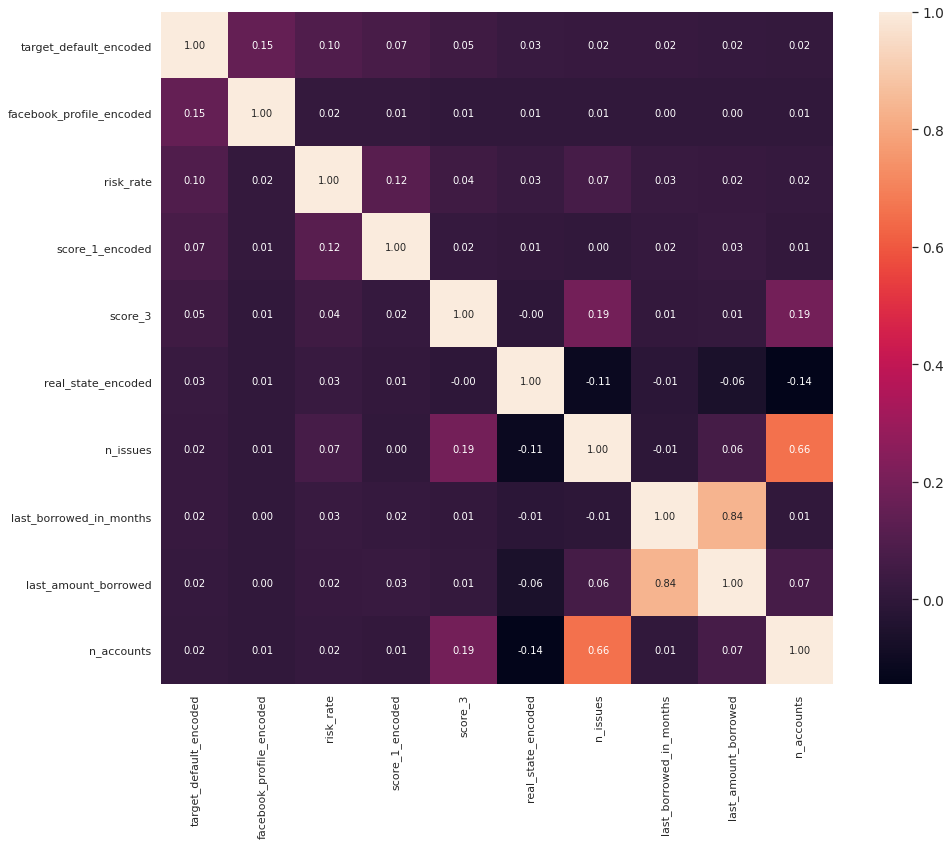

In [28]:
#@title Focused Heatmap
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'target_default_encoded')['target_default_encoded'].index
cm = np.corrcoef(encoded_eda[cols].values.T)

# plotting the heatmap
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

From the heatmaps above, we can see that the correlations are very weak.
* There are some correlations among the variables that are logical, but not relevant for the model, such as 'n_issues' and 'n_accounts'.
* It's interesting to note that 'facebook_profile_encoded' is the most correlated variable to 'target_default'.
* 'risk_rate' was expected to be a relevant variable, but the level of correlation is a little disappointing.
* It's also interesting to see that only 2 out of the 6 score related variables are among the most correlated variables. From the outside, we seem to think that these play a much bigger role in the amount of credit limit we're given.

Now, let's take a look at these correlations from another angle, using a pair plot.

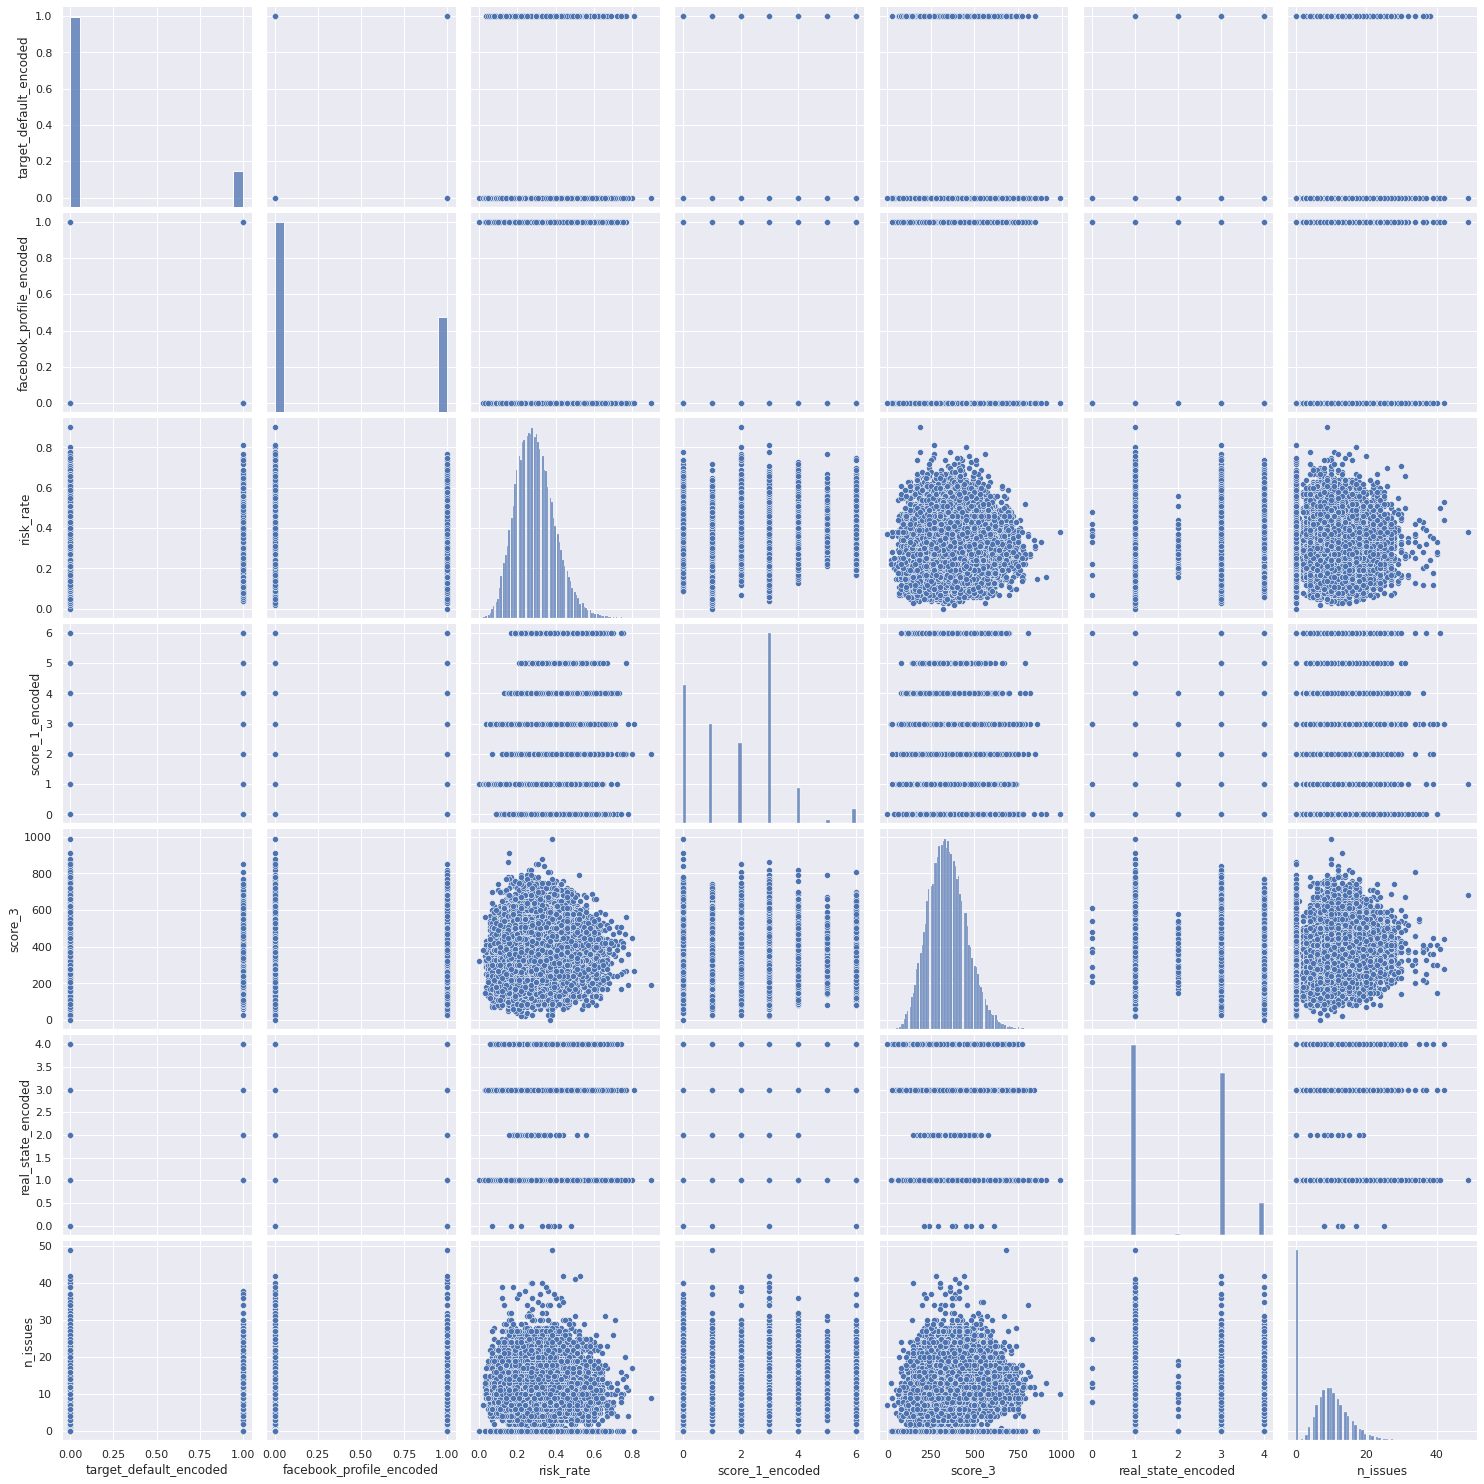

In [29]:
# pairplot
sns.set()
cols = ['target_default_encoded', 'facebook_profile_encoded', 'risk_rate', 'score_1_encoded', 'score_3', 'real_state_encoded', 'n_issues'];
sns.pairplot(encoded_eda[cols], height = 4, size=(3));
plt.show();

After better visualizing the distributions, and correlations, let's recap our conclusions:

* Weak correlations between the target variables and the other ones.
* Unexpected variables as the most correlated ones.
* Number of previous loans defaulted highly influence credit limit.
* Higher income doesn't necessarily mean higher credit limit.
* Number of issues seems to be an important variable, but without a proper understanding of what the variable actually stands for, it's hard to measure it's real influence, and determine some kind of weight for it. For that reason, let's leave it as is, in order not to bias our model.


## Machine Learning
After analyzing our data, it's time to prepare, build and train our **Machine Learning Model** to make predictions on possible defaults from clients.

<center><img alt="AI" width="50%" src="https://image.freepik.com/free-vector/particle-artificial-inteligence-face-background_23-2148291475.jpg"></center>

Keep in mind that the goal is to maximize the accuracy of the model, and minimize the number of false positives.

To help improve the accuracy of the model, let's scale the numerical variables.

In [45]:
from sklearn.preprocessing import StandardScaler

scaled_df = df_clean.copy()
# normalizing the numerical columns
num_cols = scaled_df.drop('target_default',
                         axis=1).select_dtypes(exclude='object').columns

scaled_df[num_cols] = StandardScaler().fit_transform(scaled_df[num_cols].values)

We had encoded our variables before and put them into a separate dataset. However, the idea then was to have a proper dataset for our data analysis.

With our model in mind, let's work on our original scaled dataset and encode its categorical variables.

In [46]:
encoded_df = scaled_df.copy()
# extracting the categorical variables
cat_cols = encoded_df.select_dtypes('object').columns

# codifying each categorical column
for col in cat_cols:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace=True)

In [47]:
encoded_df.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code,score_1_encoded,score_2_encoded,reason_encoded,state_encoded,zip_encoded,job_name_encoded,real_state_encoded,application_time_applied_encoded,email_encoded,external_data_provider_first_name_encoded,lat_lon_encoded,marketing_channel_encoded,profile_phone_number_encoded,shipping_state_encoded,profile_tags_encoded,user_agent_encoded
0,False,0.019286,0.564509,-0.834072,0.848809,1.020438,2.551599,1.071123,-1.031692,-0.125404,1.372207,-0.090216,-0.275979,-0.05718,1.601998,1.563349,1.344562,0.447503,-1.425818,1.322556,0.502144,-0.04031,-1.291772,0,10,8335,44,208,27082,1,11973,4,19930,15025,2,27910,12,17167,86
1,False,0.201535,-0.926413,1.535143,-0.790968,-0.559085,-0.575567,-0.678612,0.261078,0.553689,-0.728753,1.199678,-0.275979,-0.05718,0.725632,0.923368,0.673865,-0.449416,-1.425818,-0.636390,-0.893856,-0.04031,0.552264,3,16,12574,47,710,4109,1,3918,0,7792,6981,5,11504,20,21553,33
2,True,0.110411,0.006380,-0.513727,1.294594,-0.065484,0.324826,1.071123,-0.197083,-0.125219,-0.728753,-0.090216,-0.275979,-0.05718,-0.150735,-1.316565,-1.653041,0.447503,0.701352,-1.097318,-1.511985,-0.04031,1.344243,3,9,4272,32,350,27321,3,1457,0,31062,14899,7,9945,19,6993,81
3,False,1.477281,0.501153,1.691282,-0.501449,0.230676,-0.575567,-0.678612,0.744817,-0.051376,-0.728753,-0.090216,3.399390,-0.05718,1.821090,1.723344,1.084496,1.344421,0.701352,0.573547,1.092492,-0.04031,0.307391,0,21,10876,23,183,85,3,16889,5,31036,5114,7,12265,17,19975,123
4,False,1.386156,-0.482217,0.112727,1.817111,-1.151406,-0.575567,-0.678612,-0.197083,-0.222459,1.372207,-0.090216,-0.275979,-0.05718,0.068357,-1.316565,-0.051582,0.447503,0.701352,1.034476,-0.626463,-0.04031,1.489370,2,1,6097,47,578,25844,3,19996,0,6609,4539,2,191,12,25813,142


At last, let's divide the target variable from the other variables and split the dataset into train and test.

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split

# separating the target variable from the others
X = encoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
y = encoded_df['target_default']

# splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)


model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.02957791 0.02921679 0.0288731  0.02898958 0.03138435 0.01918438
 0.01901775 0.02569107 0.02946294 0.02060139 0.02593902 0.01078087
 0.0013914  0.02833574 0.02759138 0.02988441 0.02541483 0.01501259
 0.03401804 0.0294762  0.00159198 0.02909234 0.03621511 0.03072452
 0.02882303 0.02854767 0.02900417 0.02907027 0.01777077 0.0329129
 0.0238432  0.02853933 0.03657971 0.02591682 0.04331325 0.02744601
 0.03085504 0.02991015]


In [49]:
# calculando importância das features para Random Forest
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

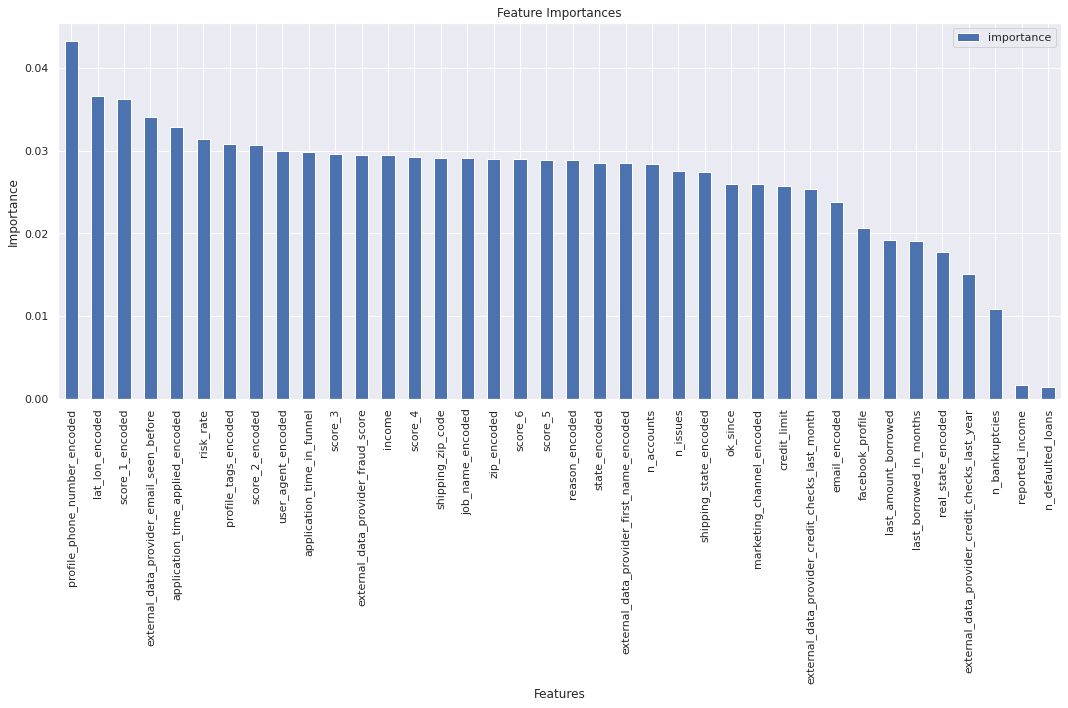

In [51]:
# plotar o gráfico de barras para variáveis mais importantes
fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Feature Importances")
ax.set_xlabel("Features")
ax.set_ylabel("Importance")

plt.savefig("feat_imp.png")
plt.tight_layout()

In [52]:
feature_importances['features']

0                        profile_phone_number_encoded
1                                     lat_lon_encoded
2                                     score_1_encoded
3            external_data_provider_email_seen_before
4                    application_time_applied_encoded
5                                           risk_rate
6                                profile_tags_encoded
7                                     score_2_encoded
8                                  user_agent_encoded
9                          application_time_in_funnel
10                                            score_3
11                 external_data_provider_fraud_score
12                                             income
13                                            score_4
14                                  shipping_zip_code
15                                   job_name_encoded
16                                        zip_encoded
17                                            score_6
18                          

In [53]:
df_ml = encoded_df[['profile_phone_number_encoded', 'lat_lon_encoded',
                     'score_1_encoded', 'external_data_provider_email_seen_before',
                     'application_time_applied_encoded', 'risk_rate',
                     'profile_tags_encoded', 'score_2_encoded', 'user_agent_encoded','application_time_in_funnel',
                     'score_3', 'income', 'external_data_provider_fraud_score', 'score_4',
                     'shipping_zip_code', 'job_name_encoded', 'zip_encoded',
                     'score_6', 'score_5', 'reason_encoded']]

df_ml['target_default'] = encoded_df['target_default']

In [54]:
from sklearn.model_selection import train_test_split

# separating the target variable from the others
X = df_ml.drop('target_default', axis=1).select_dtypes(exclude='object')
y = df_ml['target_default']

# splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

True     4663
False    4663
dtype: int64


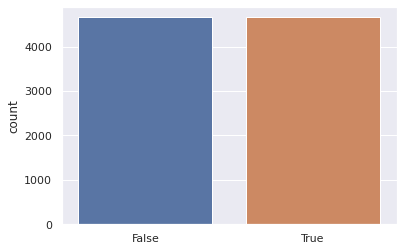

In [55]:
from imblearn.under_sampling import RandomUnderSampler

# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

In [56]:
# construindo função de avaliação do baseline
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independetes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.4f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

# criar baseline e ver desempenho
rf = RandomForestClassifier()
score_baseline = val_model(X_rus, y_rus, rf)

Recall: 0.5827 (+/- 0.01)


In [57]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []
# avaliar o desempenho
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train, y_train, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['recall'])

,recall
RandomForestClassifier,0.043535
DecisionTreeClassifier,0.238904
SGDClassifier,0.000000
SVC,0.000000
LogisticRegression,0.001501
XGBClassifier,0.079135
LGBMClassifier,0.106802


In [58]:
# verificando os parâmetros
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [59]:
# instanciando o modelo
dt = DecisionTreeClassifier(random_state=42)

# definindo os parâmetros a serem testados
param_grid = {
  'max_depth': [4, 10, 15],  
  'ccp_alpha':[0.0, 0.5, 1.0],
  'criterion':['gini', 'entropy'],
  'max_depth': [1, 5, 10]
 }

# identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(dt, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# ver resultados
print("Melhor: {:.2f} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.54 para {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5}


In [60]:
# instanciando o modelo e treinando o mesmo
ml_model = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=5, criterion='gini',
                         random_state=42)

ml_model.fit(X_rus, y_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Mind that the dataset used in this project is not balanced, and that may generate metrics that don't represent the reality of the problematic situation of the real world.

Without further ado, let's present the accuracy of the model as a simple evaluation metric.

Classification Report:
               precision    recall  f1-score   support

       False     0.9025    0.6858    0.7794     11502
        True     0.2408    0.5736    0.3392      1998

    accuracy                         0.6692     13500
   macro avg     0.5716    0.6297    0.5593     13500
weighted avg     0.8046    0.6692    0.7142     13500

Accuracy Score:	 0.6692

ROC_AUC:	 0.6297



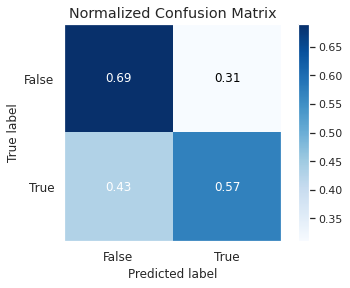

In [62]:
# predictions and probabilities on the test dataset
y_pred = ml_model.predict(X_test)

# checking the performance of the algorithm
# classification report
print('Classification Report:\n', classification_report(y_test,y_pred, digits=4))

# accuracy
print('Accuracy Score:\t {:.4f}\n'.format(accuracy_score(y_test,y_pred)))

# AUC
print('ROC_AUC:\t {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

# confusion matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize=True);


### Performance Report

Our model could definitely benefit from some tweaks. We could try other kinds of encoding, another way of balancing the data, feature engineering, etc. This works to show us how complex this problem is, and how much work it actually needs.

We were able to beat our baseline, and have good-enough results for this mvp project. However, it's far from perfect. We are still providing credit to people who shouldn't have it, and denying it to people who should have it.

# Conclusions

It's safe to assume that this is a multiobjective problem of optimization, in which it's expected to minimize false positives while maximizing true positives.

Soon, this project will be improved with more advanced techniques in order to provide a more robust and accurate solution.


[<center><img alt="LinkedIn" width="20%" src="https://www.freepnglogos.com/uploads/linkedin-png-logo-23.png
"></center>](https://www.linkedin.com/in/rafael-n-duarte/) 
[<center><img alt="GitHub" width="20%" src="https://github.githubassets.com/images/modules/logos_page/GitHub-Logo.png
"></center>](https://github.com/rafaelnduarte)


<center><img width = '80%'src= "https://github.com/rafaelnduarte/Portfolio/blob/master/rafaelnd_banner.png?raw=true"></center>